In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

# Global parameters for the figure.
plt.style.use('seaborn-deep')
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 36
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.fontsize"] = "small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 18
plt.rcParams["lines.markeredgewidth"] = 3

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8

### How the data was generated

1. The hidden variables for the networks in (a) were generated via
```
python generate_hidden_variables_for_expected_degree_validation.py
```
2. Directed networks according to the directed $S^1$ model were generated and analyzed via 
```
python generate_synthetic_directedS1_networks_and_extract_degrees_for_validation.py
```
3. The parameters of the directed $S^1$ were inferred via 
```
python infer_real_network_parameters.py <name of the real network>
python infer_real_network_parameters_custom_beta.py <name of the real network> <custom value for beta>
```
4. Directed networks according to the directed $S^1$ model were generated and analyzed via 
```
python generate_inferred_networks_and_extract_degree_seq_and_dist.py <name of the real network with suffix set at the previous step>
```

### Figure in SM

#### Analyzes the results of the numerical simulations and combines them with the theoretical values

In [2]:
def lower_bound(x):
    return np.percentile(x, 2.5)
    # return np.min(x)
def upper_bound(x):
    return np.percentile(x, 97.5)
    # return np.max(x)

name = 'graphC_00'

filename = '../../directedS1_data/synthetic_networks/degrees/' + name + '_degree_seq.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df_num = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df_num = df_num.groupby('vertex', as_index=False)[['iDeg', 'oDeg']].agg(['mean', lower_bound, upper_bound])
# df_num.set_index('vertex', inplace=True)

filename = '../../directedS1_data/synthetic_networks/hidden_variables/' + name + '_hidden_variables.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df_theo = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df_theo.set_index('vertex', inplace=True)

df_theo.columns = pd.MultiIndex.from_product([['hidden'], df_theo.columns])
df = pd.concat([df_theo, df_num], axis=1)

#### Plots the figure

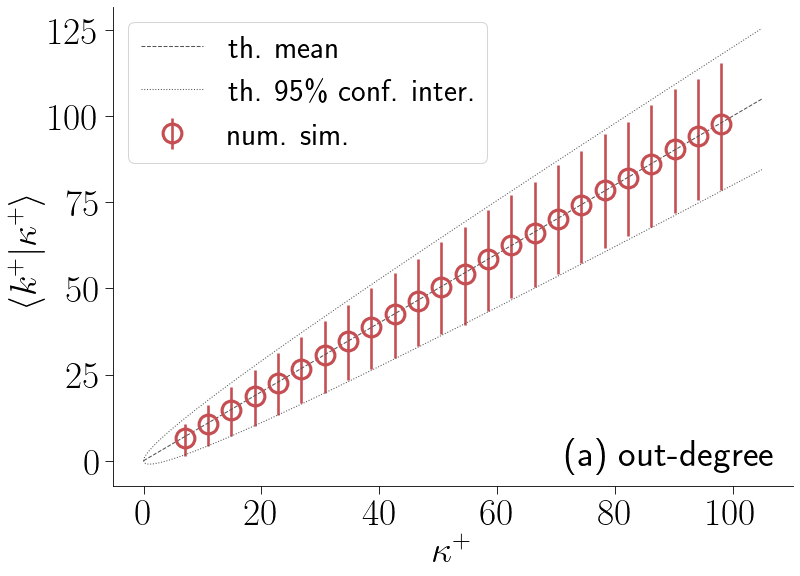

In [3]:
fig, ax = plt.subplots()

val_min = 5
val_max = 100
nb_bins = 25

xx = np.arange(0, 105, 0.1)
ax.plot(xx, xx, linestyle='--', linewidth=1, color='#545454', label=r'th. mean')
ax.plot(xx, xx-2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454', label=r'th. 95\% conf. inter.')
ax.plot(xx, xx+2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454')

xx = df['hidden', 'kappa_out'].values
yp = df['oDeg', 'upper_bound'].values
ym = df['oDeg', 'lower_bound'].values
yy = df['oDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
ax.errorbar(xx, yy, yerr=(yp-yy, yy-ym),
            linestyle="None", marker='o', markerfacecolor="None", color='#C44E52',
            label=r'num. sim.')

plt.text(0.975, 0.025, r"{}".format(r"(a) out-degree"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"$\kappa^+$")
ax.set_ylabel(r"$\langle k^+|\kappa^+ \rangle$")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left", ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_outdegrees_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_outdegrees_" + name + ".svg", bbox_inches='tight')

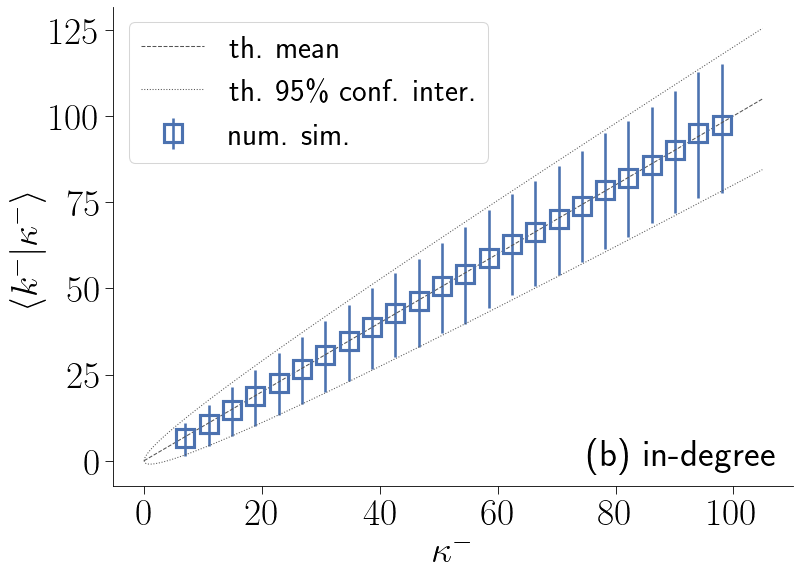

In [4]:
fig, ax = plt.subplots()

val_min = 5
val_max = 100
nb_bins = 25

xx = np.arange(0, 105, 0.1)
ax.plot(xx, xx, linestyle='--', linewidth=1, color='#545454', label=r'th. mean')
ax.plot(xx, xx-2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454', label=r'th. 95\% conf. inter.')
ax.plot(xx, xx+2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454')

xx = df['hidden', 'kappa_in'].values
yp = df['iDeg', 'upper_bound'].values
ym = df['iDeg', 'lower_bound'].values
yy = df['iDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
ax.errorbar(xx, yy, yerr=(yp-yy, yy-ym),
            linestyle="None", marker='s', markerfacecolor="None",color='#4C72B0',
            label=r'num. sim.')

plt.text(0.975, 0.025, r"{}".format(r"(b) in-degree"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"$\kappa^-$")
ax.set_ylabel(r"$\langle k^-|\kappa^- \rangle$")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left", ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_indegrees_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_indegrees_" + name + ".svg", bbox_inches='tight')

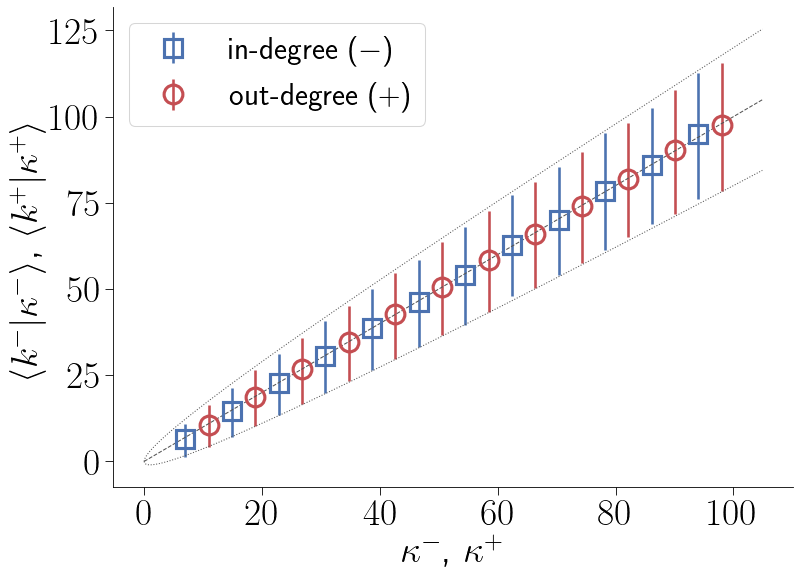

In [5]:
fig, ax = plt.subplots()

val_min = 5
val_max = 100
nb_bins = 25

xx = np.arange(0, 105, 0.1)
ax.plot(xx, xx, linestyle='--', linewidth=1, color='#545454')
ax.plot(xx, xx-2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454')
ax.plot(xx, xx+2*np.sqrt(xx), linestyle=':', linewidth=1, color='#545454')

xx = df['hidden', 'kappa_in'].values
yp = df['iDeg', 'upper_bound'].values
ym = df['iDeg', 'lower_bound'].values
yy = df['iDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
ax.errorbar(xx, yy, yerr=(yp-yy, yy-ym),
            linestyle="None", marker='s', markerfacecolor="None", markevery=2, errorevery=2, color='#4C72B0',
            label=r'in-degree ($-$)')

xx = df['hidden', 'kappa_out'].values
yp = df['oDeg', 'upper_bound'].values
ym = df['oDeg', 'lower_bound'].values
yy = df['oDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
ax.errorbar(xx[1:], yy[1:], yerr=(yp[1:]-yy[1:], yy[1:]-ym[1:]),
            linestyle="None", marker='o', markerfacecolor="None", markevery=2, errorevery=2, color='#C44E52',
            label=r'out-degree ($+$)')

# plt.text(0.975, 0.025, r"{}".format(r"(a) uncorrelated $\kappa^-$ and $\kappa^+$"),
#          horizontalalignment="right", verticalalignment="bottom",
#          fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"$\kappa^-$, $\kappa^+$")
ax.set_ylabel(r"$\langle k^-|\kappa^- \rangle$, $\langle k^+|\kappa^+ \rangle$")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left", ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_degrees_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_degrees_" + name + ".svg", bbox_inches='tight')

### Figure 3d

#### Analyzes the results of the numerical simulations and combines them with the theoretical values

In [6]:
def lower_bound(x):
    return np.percentile(x, 2.5)
    # return np.min(x)
def upper_bound(x):
    return np.percentile(x, 97.5)
    # return np.max(x)

name = 'polblogs_beta1p75_00'

filename = '../../directedS1_data/synthetic_networks/degrees/' + name + '_degree_seq.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df_num = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df_num = df_num.groupby('vertex', as_index=False)[['iDeg', 'oDeg']].agg(['mean', lower_bound, upper_bound])
# df_num.set_index('vertex', inplace=True)

filename = '../../directedS1_data/real_networks/inferred_parameters/' + name + '_infparams.txt'
with open(filename, 'r') as f:
    lines = f.readlines()
header = lines[30].replace('#', ' ').split()
df_theo = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df_theo.set_index('Vertex', inplace=True)

df_theo.columns = pd.MultiIndex.from_product([['original'], df_theo.columns])
df = pd.concat([df_theo, df_num], axis=1)

#### Plots the figure

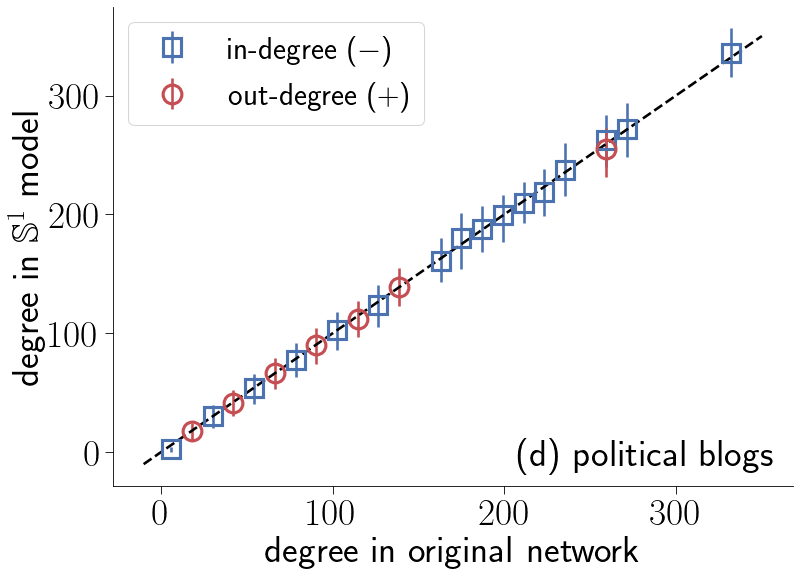

In [7]:
fig, ax = plt.subplots()

val_min = 0
val_max = 350
nb_bins = 30

ax.plot([val_min-10, val_max], [val_min-10, val_max],
        linestyle='--', color='k')

xx = df['original', 'realInDegree'].values
yp = df['iDeg', 'upper_bound'].values
ym = df['iDeg', 'lower_bound'].values
yy = df['iDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
idx = [i for i, v in enumerate(xx) if (v < 150) and (i%2 == 0)]
idx.extend([i for i, v in enumerate(xx) if v > 150])
ax.errorbar(xx[idx], yy[idx], yerr=(yp[idx]-yy[idx], yy[idx]-ym[idx]),
            linestyle="None", marker='s', markerfacecolor="None", color='#4C72B0',
            label=r'in-degree ($-$)')

xx = df['original', 'realOutDegree'].values
yp = df['oDeg', 'upper_bound'].values
ym = df['oDeg', 'lower_bound'].values
yy = df['oDeg', 'mean'].values
bins = np.linspace(val_min, val_max, nb_bins)
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = np.array([x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0])
yp = np.array([p for p, y in zip(yp, yy) if y > 0])
ym = np.array([m for m, y in zip(ym, yy) if y > 0])
yy = np.array([y for y in yy if y > 0])
idx = [i for i, v in enumerate(xx) if (v < 150) and (i%2 == 1)]
idx.extend([i for i, v in enumerate(xx) if v > 150])
ax.errorbar(xx[idx], yy[idx], yerr=(yp[idx]-yy[idx], yy[idx]-ym[idx]),
            linestyle="None", marker='o', markerfacecolor="None", color='#C44E52',
            label=r'out-degree ($+$)')

plt.text(0.975, 0.025, r"{}".format(r"(d) political blogs"),
         horizontalalignment="right", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"degree in original network")
ax.set_ylabel(r"degree in $\mathbb{S}^1$ model")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(loc="upper left", ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_degrees_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_degrees_" + name + ".svg", bbox_inches='tight')

### Figure 3b and 3c

#### Analyzes the results of the numerical simulations and combines them with the theoretical values

In [8]:
def lower_bound(x):
    return np.percentile(x, 2.5)
    # return np.min(x)
def upper_bound(x):
    return np.percentile(x, 97.5)
    # return np.max(x)

name = 'polblogs_beta1p75_00'

filename = '../../directedS1_data/synthetic_networks/degrees/' + name + '_degree_dist.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df = df.groupby('k', as_index=False)[['iDeg', 'oDeg']].agg(['mean', lower_bound, upper_bound])

filename = '../../directedS1_data/real_networks/inferred_parameters/' + name + '_infparams.txt'
with open(filename, 'r') as f:
    lines = f.readlines()
header = lines[30].replace('#', ' ').split()
df_theo = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+")
df_theo.set_index('Vertex', inplace=True)

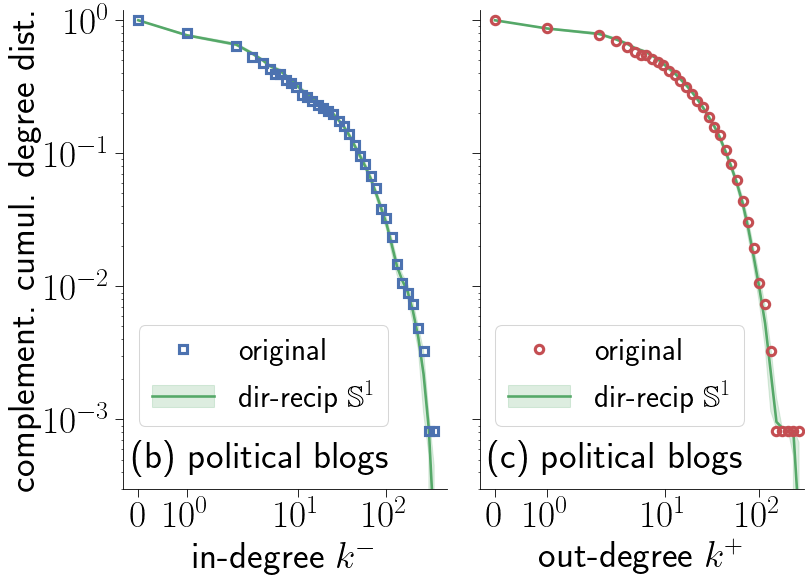

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)

val_max = 1000
nb_bins = 40

xx = df.index.values
yp = df['iDeg', 'upper_bound'].values
ym = df['iDeg', 'lower_bound'].values
yy = df['iDeg', 'mean'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yp = [p for p, y in zip(yp, yy) if y > 0]
ym = [m for m, y in zip(ym, yy) if y > 0]
yy = [y for y in yy if y > 0]
p1 = ax1.plot(xx, yy, linestyle="-", color='#55A868')[0]
p2 = ax1.fill(np.NaN, np.NaN, alpha=0.2, color='#55A868')[0]
ax1.fill_between(xx, yp, ym, alpha=0.2, color='#55A868')

xx = df_theo['realInDegree'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yy = (np.histogram(xx, bins=bins)[0] / len(xx))[::-1].cumsum()[::-1]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yy = [y for y in yy if y > 0]
p3 = ax1.plot(xx, yy, linestyle="None", marker='s', markerfacecolor="None", markersize=8, color='#4C72B0')[0]


xx = df.index.values
yp = df['oDeg', 'upper_bound'].values
ym = df['oDeg', 'lower_bound'].values
yy = df['oDeg', 'mean'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yp = [p for p, y in zip(yp, yy) if y > 0]
ym = [m for m, y in zip(ym, yy) if y > 0]
yy = [y for y in yy if y > 0]
p4 = ax2.plot(xx, yy, linestyle="-", color='#55A868')[0]
p5 = ax2.fill(np.NaN, np.NaN, alpha=0.2, color='#55A868')[0]
ax2.fill_between(xx, yp, ym, alpha=0.2, color='#55A868')


xx = df_theo['realOutDegree'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yy = (np.histogram(xx, bins=bins)[0] / len(xx))[::-1].cumsum()[::-1]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yy = [y for y in yy if y > 0]
p6 = ax2.plot(xx, yy, linestyle="None", marker='o', markerfacecolor="None", markersize=8, color='#C44E52')[0]


plt.text(0.025, 0.025, r"{}".format(r"(b) political blogs"),
         horizontalalignment="left", verticalalignment="bottom",
         fontsize='medium', transform=ax1.transAxes)

plt.text(0.025, 0.025, r"{}".format(r"(c) political blogs"),
         horizontalalignment="left", verticalalignment="bottom",
         fontsize='medium', transform=ax2.transAxes)

ax1.set_xlabel(r"in-degree $k^-$")
ax1.set_ylabel(r"complement. cumul. degree dist.")
ax2.set_xlabel(r"out-degree $k^+$")
#fig.text(0.04, 0.5, r"Comp. cumul. degree dist.", va='center', rotation='vertical')

ax1.set_xscale('symlog')
ax1.set_yscale('log')
ax2.set_xscale('symlog')
ax2.set_yscale('log')

ax1.set_xlim(right=500)
ax1.set_ylim(bottom=3e-4, top=1.2e0)
ax2.set_xlim(right=300)
ax2.set_ylim(bottom=3e-4, top=1.2e0)

ax2.set_yticklabels([])

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

fig.subplots_adjust(wspace=0.1)

ax1.legend([p3, (p1, p2)], [r'original', r"dir-recip $\mathbb{S}^1$"], loc="lower left", bbox_to_anchor=(0,0.1), ncol=1)
ax2.legend([p6, (p4, p5)], [r'original', r"dir-recip $\mathbb{S}^1$"], loc="lower left", bbox_to_anchor=(0,0.1), ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_degree_dist_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_degree_dist_" + name + ".svg", bbox_inches='tight')

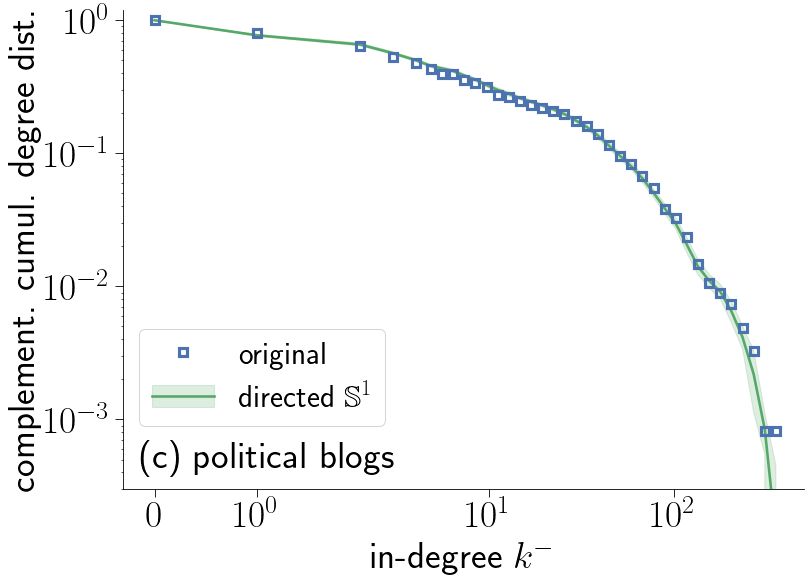

In [10]:
# Old version
fig, ax = plt.subplots()

val_max = 1000
nb_bins = 40

xx = df.index.values
yp = df['iDeg', 'upper_bound'].values
ym = df['iDeg', 'lower_bound'].values
yy = df['iDeg', 'mean'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yp = [p for p, y in zip(yp, yy) if y > 0]
ym = [m for m, y in zip(ym, yy) if y > 0]
yy = [y for y in yy if y > 0]
p1 = ax.plot(xx, yy, linestyle="-", color='#55A868')[0]
p2 = ax.fill(np.NaN, np.NaN, alpha=0.2, color='#55A868')[0]
ax.fill_between(xx, yp, ym, alpha=0.2, color='#55A868')

xx = df_theo['realInDegree'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yy = (np.histogram(xx, bins=bins)[0] / len(xx))[::-1].cumsum()[::-1]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yy = [y for y in yy if y > 0]
p3 = ax.plot(xx, yy, linestyle="None", marker='s', markerfacecolor="None", markersize=8, color='#4C72B0')[0]

plt.text(0.025, 0.025, r"{}".format(r"(c) political blogs"),
         horizontalalignment="left", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"in-degree $k^-$")
ax.set_ylabel(r"complement. cumul. degree dist.")

ax.set_xscale('symlog')
ax.set_yscale('log')

ax.set_xlim(right=500)
ax.set_ylim(bottom=3e-4, top=1.2e0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend([p3, (p1, p2)], [r'original', r"directed $\mathbb{S}^1$"], loc="lower left", bbox_to_anchor=(0.0,0.1), ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_indegree_dist_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_indegree_dist_" + name + ".svg", bbox_inches='tight')

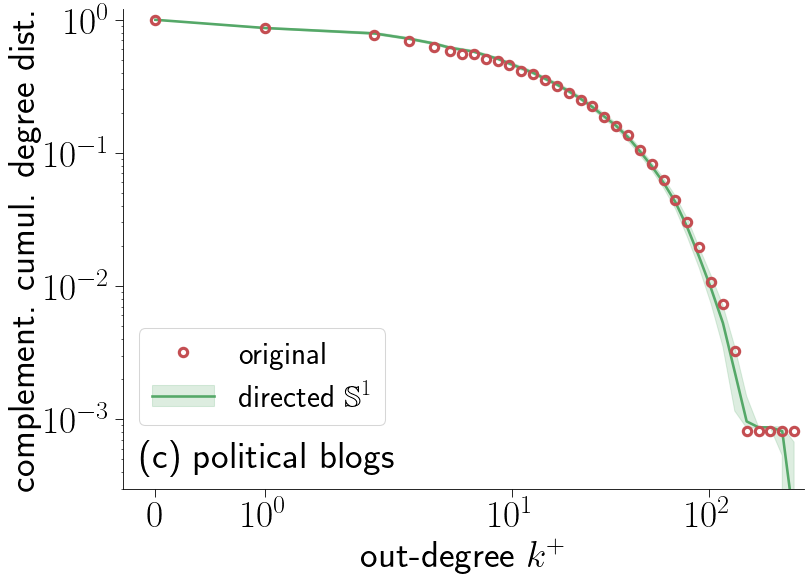

In [11]:
fig, ax = plt.subplots()

val_max = 1000
nb_bins = 40

xx = df.index.values
yp = df['oDeg', 'upper_bound'].values
ym = df['oDeg', 'lower_bound'].values
yy = df['oDeg', 'mean'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yp = [p / n if n > 0 else 0 for p, n in zip(np.histogram(xx, bins=bins, weights=yp)[0], np.histogram(xx, bins=bins)[0])]
ym = [m / n if n > 0 else 0 for m, n in zip(np.histogram(xx, bins=bins, weights=ym)[0], np.histogram(xx, bins=bins)[0])]
yy = [y / n if n > 0 else 0 for y, n in zip(np.histogram(xx, bins=bins, weights=yy)[0], np.histogram(xx, bins=bins)[0])]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yp = [p for p, y in zip(yp, yy) if y > 0]
ym = [m for m, y in zip(ym, yy) if y > 0]
yy = [y for y in yy if y > 0]
p4 = ax.plot(xx, yy, linestyle="-", color='#55A868')[0]
p5 = ax.fill(np.NaN, np.NaN, alpha=0.2, color='#55A868')[0]
ax.fill_between(xx, yp, ym, alpha=0.2, color='#55A868')

xx = df_theo['realOutDegree'].values
bins = np.append(np.arange(-0.5, 4.5, 1), np.logspace(np.log10(4.5), np.log10(val_max), nb_bins))
yy = (np.histogram(xx, bins=bins)[0] / len(xx))[::-1].cumsum()[::-1]
xx = [x for x, y in zip((bins[1:] + bins[:-1]) / 2, yy) if y > 0]
yy = [y for y in yy if y > 0]
p6 = ax.plot(xx, yy, linestyle="None", marker='o', markerfacecolor="None", markersize=8, color='#C44E52')[0]

plt.text(0.025, 0.025, r"{}".format(r"(c) political blogs"),
         horizontalalignment="left", verticalalignment="bottom",
         fontsize='medium', transform=ax.transAxes)

ax.set_xlabel(r"out-degree $k^+$")
ax.set_ylabel(r"complement. cumul. degree dist.")

ax.set_xscale('symlog')
ax.set_yscale('log')

ax.set_xlim(right=300)
ax.set_ylim(bottom=3e-4, top=1.2e0)

# ax.set_yticklabels([])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# fig.subplots_adjust(wspace=0.1)

ax.legend([p6, (p4, p5)], [r'original', r"directed $\mathbb{S}^1$"], loc="lower left", bbox_to_anchor=(0.0,0.1), ncol=1)

fig.savefig("../figures/pdf/figure_paper_validation_expected_outdegree_dist_" + name + ".pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_validation_expected_outdegree_dist_" + name + ".svg", bbox_inches='tight')